In [19]:
import numpy as np
import matplotlib.pylab as plt
import scipy, os
from scipy.stats import norm


from palettable.cmocean.sequential import Ice_20# Oslo_20
palettable_cmap = Ice_20 #Ice_20
pal_cmap = palettable_cmap.mpl_colormap


In [20]:
def lin(x,a,b):
	return a*x+b

In [21]:
import random
from operator import add, sub, mul

ops = (add, sub)
op = random.choice(ops)

print(op(1,1))

2


In [22]:
plt.rcParams.update({'lines.linewidth': 2,'lines.markersize': 12,}) #1.5 default?
plt.rcParams.update({'font.size': 14})

In [23]:
x_ax = np.linspace(0,10,20)
y = lin(x_ax,0.7,0)

# for i in range(len(x_ax)):
# 	y[i] = y[i] * np.random.uniform(0.6,1) #+ np.random.uniform(0,0.8)

for i in range(len(x_ax)):
	op = random.choice(ops)
	y[i] = op(y[i], np.random.uniform(0.1,0.4)) * np.random.uniform(0.6,1)

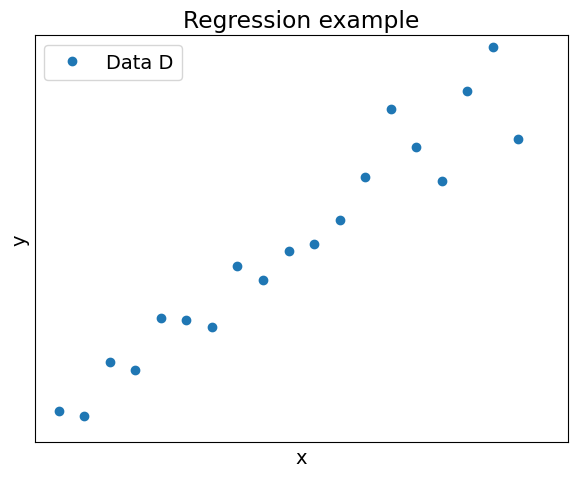

In [40]:
fig, ax = plt.subplots(figsize=(6,5))

ax.plot(x_ax,y, ls='none', marker = '.', label = 'Data D')
# ax.plot(x_ax,lin(x_ax,0.7,0)*0.8, label = 'Fit')
plt.legend()

plt.xlabel('x')
plt.ylabel('y')

plt.ylim((-0.4, 6))

plt.xticks([])
plt.yticks([])
plt.title('Regression example')
plt.tight_layout()
plt.savefig('Figures/Regression_unfitted.svg')


In [41]:
def gauss(x, mean, std_dev): #A amplitude, mu - mean, sigma - std deviation
    return 1/np.sqrt(2*np.pi) / std_dev * np.exp( - ( x-mean )**2 / ( 2*std_dev**2 ) ) # / ( np.sqrt(2) * np.pi * sigma**2 )

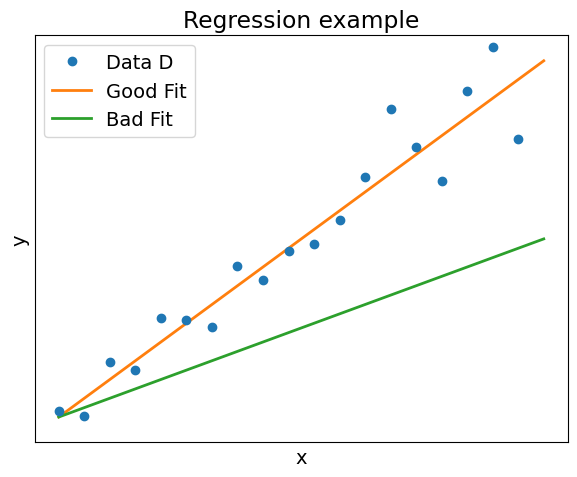

In [42]:
fig, ax = plt.subplots(figsize=(6,5))

ax.plot(x_ax,y, ls='none', marker = '.', label = 'Data D', zorder = 10)
ax.plot(x_ax,lin(x_ax,0.7,0)*0.8, label = 'Good Fit') #
ax.plot(x_ax,lin(x_ax,0.7,0)*0.4, label = 'Bad Fit') #

idx = 8
fit = lin(x_ax,0.7,0)*0.8

# ys = np.linspace(fit[idx]-1, fit[idx] +1 , 100)
# ax.plot(x_ax[idx],fit[idx], ls='none', marker = '.', label = 'Model pt', c = 'black', alpha=0.4)
# ax.axvline(x_ax[idx]-0.1, ys.min()/6, ys.max()/6*1.13 , color = 'black' , alpha=0.4)
# ax.plot(x_ax[idx] + gauss(ys, fit[idx], 0.4)*0.5, ys ,label = 'Model distro' )


plt.legend()

plt.xlabel('x')
plt.ylabel('y')

plt.ylim((-0.4, 6))

plt.xticks([])
plt.yticks([])
plt.title('Regression example')
plt.tight_layout()
plt.savefig('Figures/Regression_fitted.svg')


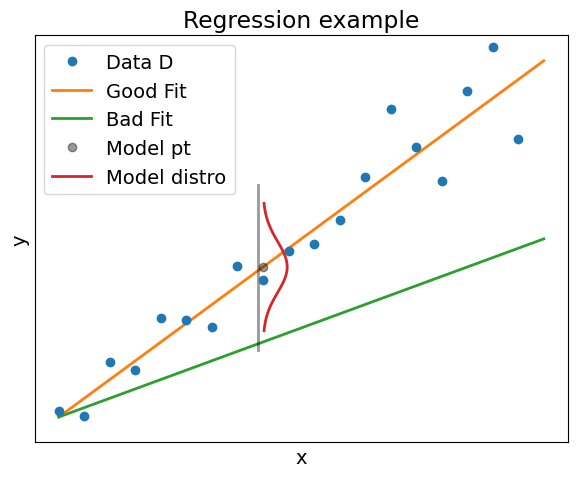

In [43]:
fig, ax = plt.subplots(figsize=(6,5))

ax.plot(x_ax,y, ls='none', marker = '.', label = 'Data D', zorder = 10)
ax.plot(x_ax,lin(x_ax,0.7,0)*0.8, label = 'Good Fit') #
ax.plot(x_ax,lin(x_ax,0.7,0)*0.4, label = 'Bad Fit') #

idx = 8
fit = lin(x_ax,0.7,0)*0.8

ys = np.linspace(fit[idx]-1, fit[idx] +1 , 100)
ax.plot(x_ax[idx],fit[idx], ls='none', marker = '.', label = 'Model pt', c = 'black', alpha=0.4)
ax.axvline(x_ax[idx]-0.1, ys.min()/6, ys.max()/6*1.13 , color = 'black' , alpha=0.4)
ax.plot(x_ax[idx] + gauss(ys, fit[idx], 0.4)*0.5, ys ,label = 'Model distro' )


plt.legend()

plt.xlabel('x')
plt.ylabel('y')

plt.ylim((-0.4, 6))

plt.xticks([])
plt.yticks([])
plt.title('Regression example')
plt.tight_layout()
plt.savefig('Figures/Regression_fitted_gauss.svg')


In [44]:
ys.min()

1.357894736842105

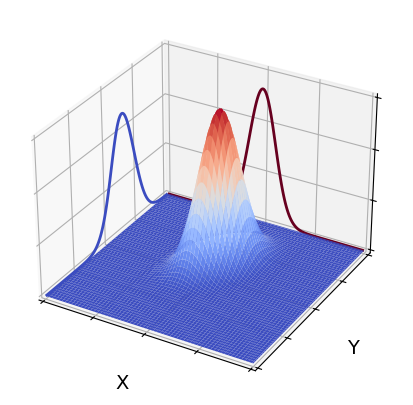

In [125]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure(figsize=(6,5)).add_subplot(projection='3d')

width = 10

x = np.linspace(-width,width,500)
y = np.linspace(-width,width,500)
X, Y = np.meshgrid(x,y)

mu_x= 0
mu_y= 2
variance_x = 2
variance_y = 4

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

Z = multivariate_normal([mu_x, mu_y], [[variance_x, 1], [1, variance_y]]).pdf(pos)

# Plot the 3D surface
ax.plot_surface(X, Y, Z,  lw=0.5, rstride=8, cstride=8, alpha=1, cmap='coolwarm', antialiased = 'False'), #e)  , edgecolor='royalblue'

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
# ax.contour(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='x', offset=-width, levels = [1], cmap='coolwarm') #, cmap='coolwarm'
ax.contour(X, Y, Z, zdir='y', offset=width, levels = [1],cmap='RdGy') #cmap='coolwarm'

ax.set(xlim=(-width, width), ylim=(-width, width),
       xlabel='X', ylabel='Y', zlabel='Z')

ax.set_xlabel('X')
ax.set_ylabel('Y')
# ax.set_zlabel('Z')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([]);
# plt.tight_layout()#
# plt.show()

plt.savefig('Figures/Marginal_Distro.svg')